## Logistic regression 

- Data should be free from missing values
- Predictant variable is binary or ordinal i.e., categorical variable with ordered values
- All predictors are independent of each other
- Sufficient observation (at least 50 per predictor) for reliable output

We will be using [Titanic dataset](https://www.kaggle.com/c/titanic/data) to predict the survival of passengers. 

**Data description:**  
Survival: 0 = No, 1 = Yes  
pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd  
sex: Sex  
Age: Age in years  
sibsp: number of siblings/spouses aboard the Titanic  
parch: number of parents/children aboard the Titanic  
ticket: Ticket number  
fare: Passenger fare  
cabin: Cabin number  
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton  

In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
# Loading our data
data = pd.read_csv("../datasets/titanic/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


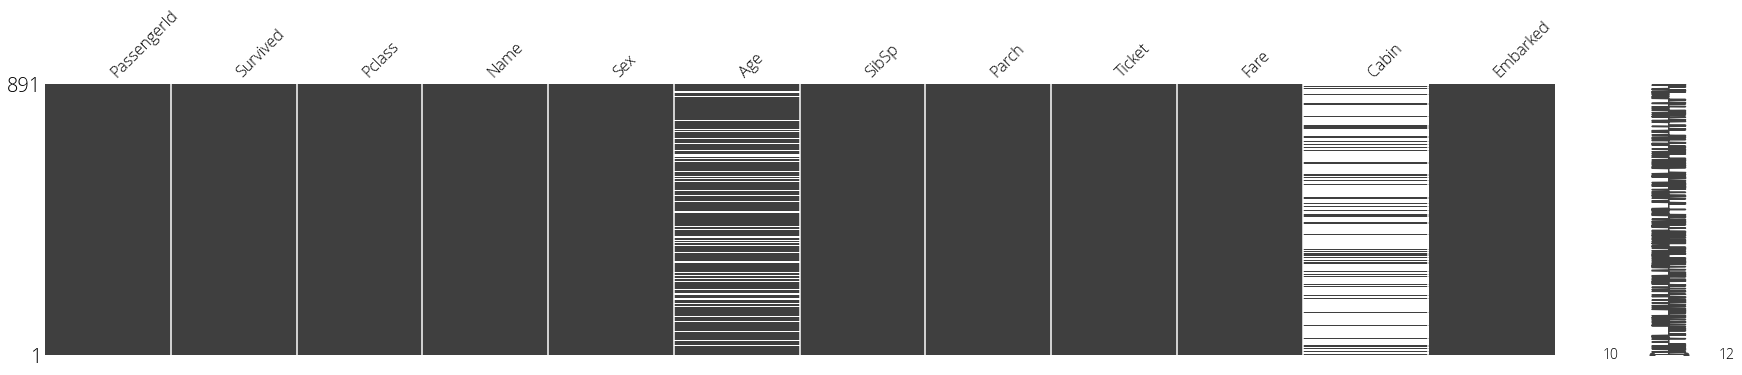

In [7]:
# How many missing values are there in our dataset?
missingno.matrix(data, figsize = (30,5))
plt.show()

In [8]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

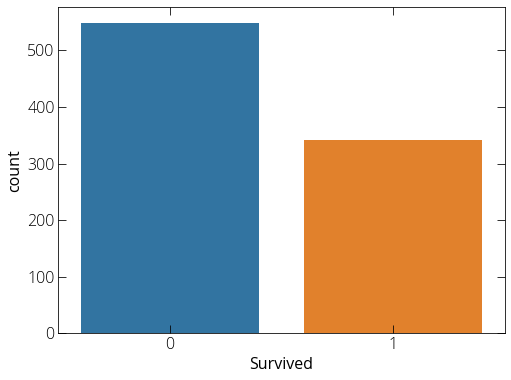

In [9]:
sns.countplot(x="Survived", data=data)
plt.show()

In [10]:
# As there are too many missing values in Cabin column, we decide to drop this 
# column 
data.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

# Alternative way to drop data
# data = data.drop(["Name", "Ticket", "Cabin"], axis=1)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

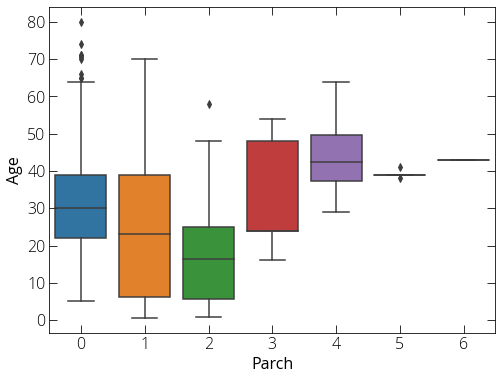

In [13]:
# Treating missing age values
sns.boxplot(x="Parch", y="Age", data=data)
plt.show()

In [14]:
data_grp = data.groupby(data["Parch"]).mean(); data_grp

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [15]:
# We will replace the missing age values by average age based on the Parch values

def replace_age(cols):
    age = cols[0]
    parch = cols[1]
    
    if pd.isna(age):
        if parch == 0:
            return 32
        elif parch == 1:
            return 24
        elif parch == 2:
            return 17
        elif parch == 3:
            return 33
        elif parch == 4:
            return 45
        elif parch == 5:
            return 39
        else: 
            return 43
    else:
        return age

In [16]:
data['Age'] = data[['Age', 'Parch']].apply(replace_age, axis=1)

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [18]:
# remove the missing Embarked rows and reset the index 
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [19]:
# Converting categorical variables to dummy indicators
# For example, for our sex category we want 0 or 1 instead of male or female
le = LabelEncoder()

gender_encoded = le.fit_transform(data['Sex'])
gender_encoded[:5]

array([1, 0, 0, 0, 1])

In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
# So 1 indicates male and 0 indicates female
# Create a new dataframe
gender_df = pd.DataFrame(gender_encoded, columns=["male"])
gender_df.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
# Do the same of embarked variable
embarked_encoded = le.fit_transform(data['Embarked'])
embarked_df = pd.DataFrame(embarked_encoded, columns=["embarked"])

In [23]:
embarked_df['embarked'].value_counts()

2    644
0    168
1     77
Name: embarked, dtype: int64

In [24]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# C = Cherbourg = 0, Q = Queenstown = 1, S = Southampton = 2
# We need to create separate binary columns for each of Embarked variable

ohe = OneHotEncoder()
embarked_binary = ohe.fit_transform(embarked_encoded.reshape(-1, 1)).toarray()
embarked_df = pd.DataFrame(embarked_binary, columns=['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [26]:
# Drop the sex and embarked colums from original dataframe and add the newly 
# created binary columns
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
data_dummy = pd.concat([data, gender_df, embarked_df], axis=1, \
                       verify_integrity=True).astype(int)
data_dummy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22,1,0,7,1,0,0,1
1,2,1,1,38,1,0,71,0,1,0,0
2,3,1,3,26,0,0,7,0,0,0,1
3,4,1,1,35,1,0,53,0,0,0,1
4,5,0,3,35,0,0,8,1,0,0,1


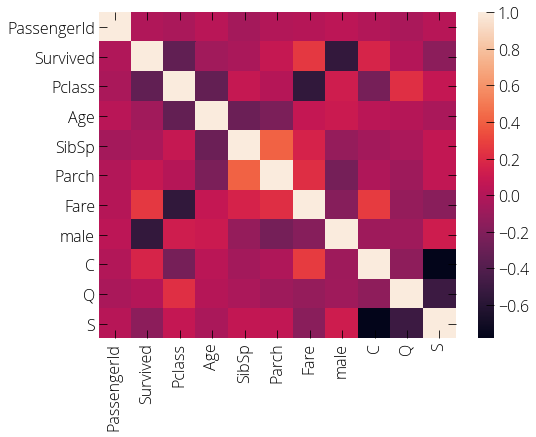

In [28]:
# Checking for independence among variables 
sns.heatmap(data_dummy.corr())
plt.colorbar
plt.show()

In [29]:
# As our model assumes independent variables we drop some of the dependent variables
data_dummy.drop(['Fare', 'Pclass'], axis=1, inplace=True)
data_dummy.head()

,PassengerId,Survived,Age,SibSp,Parch,male,C,Q,S
0,1,0,22,1,0,1,0,0,1
1,2,1,38,1,0,0,1,0,0
2,3,1,26,0,0,0,0,0,1
3,4,1,35,1,0,0,0,0,1
4,5,0,35,0,0,1,0,0,1


### Split train test dataset 

In [32]:
x, x_test, y, y_test = train_test_split(data_dummy.drop(['Survived'],axis=1),\
                                       data_dummy['Survived'], test_size=0.2,
                                        random_state=200)

In [33]:
print(x.shape, x_test.shape, y.shape, y_test.shape)

(711, 8) (178, 8) (711,) (178,)


In [34]:
### Deploy model
lr = LogisticRegression(solver='liblinear')
lr.fit(x, y)

LogisticRegression(solver='liblinear')

In [35]:
y_pred = lr.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [40]:
# Cross validation and confusion matrix
y_train_pred = cross_val_predict(lr, x, y, cv=5)
confusion_matrix(y, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [41]:
precision_score(y, y_train_pred)

0.7407407407407407

In [51]:
data_dummy.iloc[863]

PassengerId    866
Survived         1
Age             42
SibSp            0
Parch            0
male             0
C                0
Q                0
S                1
Name: 863, dtype: int64

In [53]:
data_dummy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,male,C,Q,S
863,866,1,42,0,0,0,0,0,1


In [57]:
test_passenger = np.array([866, 35, 1, 1, 0, 0, 0, 1]).reshape(1, -1)
print(lr.predict(test_passenger))

[1]


In [58]:
print(lr.predict_proba(test_passenger))

[[0.32341569 0.67658431]]
